This monday, we were witnesses to a rather large decline in Vix. Taking a quick look at how often drops like this happen and how has Vix behaved after large single day drops

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
import seaborn as sns
import quandl

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
vix = quandl.get("YAHOO/INDEX_VIX", authtoken="YOUR KEY HERE")
vix.index = pd.to_datetime(vix.index)
vix.drop({"Open", "High", "Low", "Close", "Volume"}, inplace=True, axis=1)
vix.columns = ["close"]
vix["pct"] = vix["close"].pct_change()

There havent been that many instances of Vix gapping down more than 20%. Mondays declide has made it into the top three of the hall of shame, only topped by august 2011 and october 2008

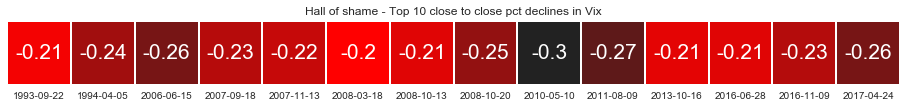

In [3]:
heat = vix[vix["pct"] <= -0.2].transpose().iloc[1:]
heat.columns = heat.columns.map(lambda x: str(x)[:10])

cmap = sns.dark_palette("red", as_cmap=True)

fig, ax = plt.subplots(1, figsize=(16, 9))
ax = sns.heatmap(heat, square=True, cmap=cmap, linewidths=1,
                 annot=True, cbar=False, annot_kws={"size":21})
ax.axes.get_yaxis().set_visible(False)
plt.title("Hall of shame - Top 10 close to close pct declines in Vix")
#fig.autofmt_xdate()
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%d"))
#plt.gcf().autofmt_xdate()

20%+ declines are indeed rare while 20%+ spikes are not (comparatively speaking)

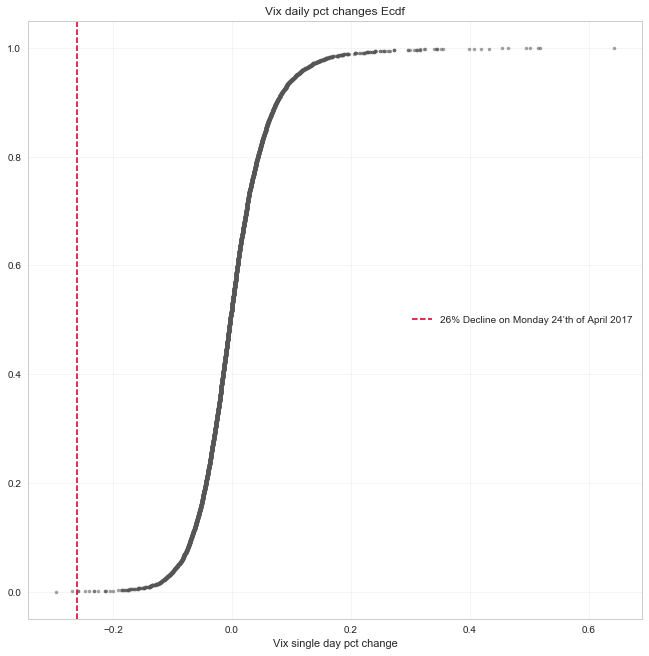

In [92]:
ecd = np.arange(1, len(vix)+1) / len(vix)

plt.figure(figsize=(11, 11))
plt.plot(np.sort(vix["pct"]), ecd, linestyle="none", marker=".", alpha=0.55, color="#555555")
plt.axvline(-0.26, linestyle="--", color="crimson", label="26% Decline on Monday 24’th of April 2017")
plt.grid(alpha=0.21)
plt.title("Vix daily pct changes Ecdf")
plt.xlabel("Vix single day pct change")
#plt.ylabel("Percentage of all Vix pct changes")
plt.legend(loc="center right")

Not much really to look at on the scatter, since the sample size is very small on the 20%+ declines

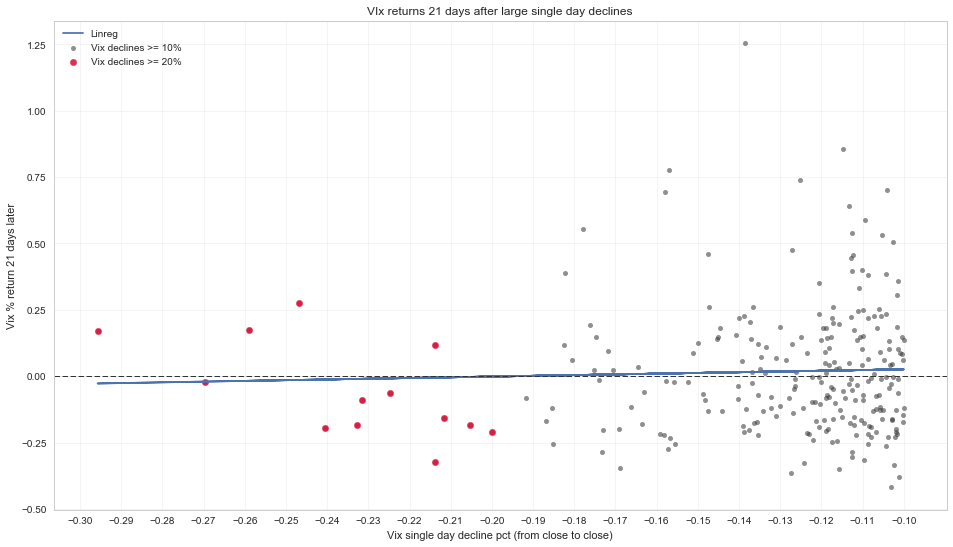

In [95]:
def rets(df, shift):
    out = (df.shift(-shift) / df) - 1
    return out

rets_10 = rets(vix["close"], 21).where(vix["pct"] <= -0.1).dropna()
vix_10 = vix["pct"][vix["pct"] <= -0.1].iloc[:-1]
rets_20 = rets(vix["close"], 21).where(vix["pct"] <= -0.2)

slope, intercept, r_val, p_val, std_err = sp.stats.linregress(vix_10, rets_10)
rets_10_pred = intercept + slope * vix_10

plt.figure(figsize=(16, 9))
plt.plot(vix_10, rets_10_pred, linestyle="-", label="Linreg")
plt.scatter(vix_10, rets_10, color="#333333", alpha=0.55, s=21, label="Vix declines >= 10%")
plt.scatter(vix["pct"], rets_20, color="crimson", alpha=0.89, s=42, label="Vix declines >= 20%")
plt.grid(alpha=0.21)
plt.title("VIx returns 21 days after large single day declines")
plt.ylabel("Vix % return 21 days later")
plt.xlabel("Vix single day decline pct (from close to close)")
plt.axhline(linestyle="--", linewidth=1, color="#333333")
plt.xticks(np.arange(-0.3, -0.09, 0.01))
plt.legend(loc="upper left")

According to past instances, Vix should head south again after gathering itself

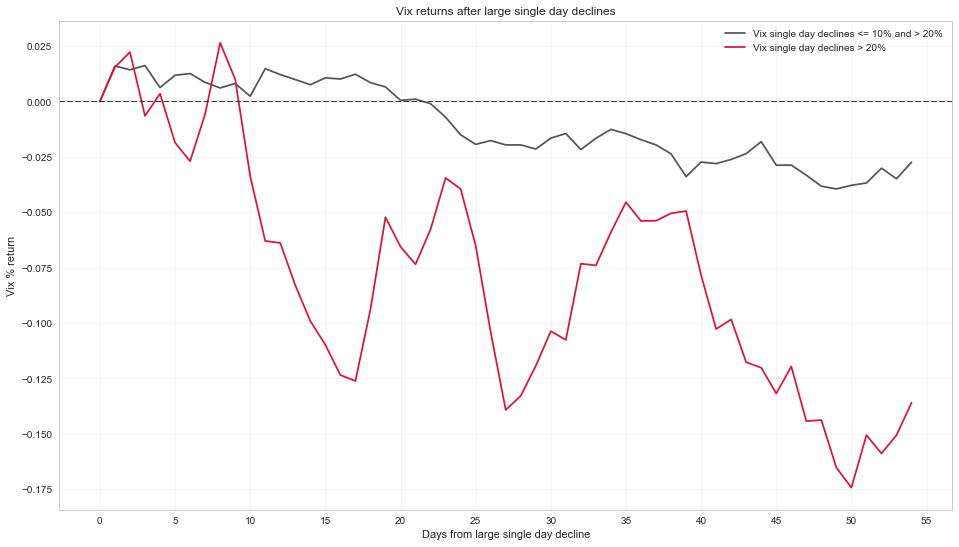

In [96]:
def getRets(df, days, pct, pct_to):
    df = df.reset_index()
    df_out = pd.DataFrame()
    for index, row in df.iterrows():
        if row["pct"] <= pct and row["pct"] > pct_to and df2["pct"].iloc[index-1] > pct:
            ret = df2["close"].iloc[index:index+days]
            ret = np.log(ret).diff()
            ret.iloc[:1] = 0
            ret.reset_index(drop=True, inplace=True)
            df_out[index] = ret
            #print(ret)
            
    return df_out

vix_21rets_10 = getRets(vix, 55, -0.1, -0.2).mean(axis=1).cumsum()
vix_21rets_20 = getRets(vix, 55, -0.2, -1).mean(axis=1).cumsum()

plt.figure(figsize=(16, 9))
plt.plot(vix_21rets_10, color="#555555", label="Vix single day declines <= 10% and > 20%")
plt.plot(vix_21rets_20, color="crimson", label="Vix single day declines > 20%")
plt.grid(alpha=0.21)
plt.title("Vix returns after large single day declines")
plt.ylabel("Vix % return")
plt.xlabel("Days from large single day decline")
plt.axhline(linestyle="--", linewidth=1, color="#333333")
plt.xticks(np.arange(0, 56, 5))
plt.legend(loc="upper right")

Thanks your time and feel free to leave a comment